In [1]:
import os
import cv2
import matplotlib.pyplot as plt
#you could import more libraries if you want
#always show your answer after changing the image.

In [2]:
path = os.getcwd()
file_path = os.path.dirname(path)
file_path

'/home/jovyan/work/Assignment_2'

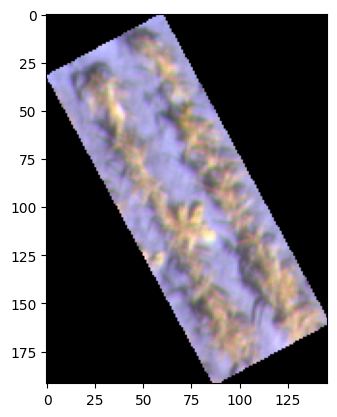

In [3]:
### First read the image and assign it to a variable.
image = cv2.imread(f"{file_path}/Data/Assignment_02_image.png")
plt.imshow(image);

In [4]:
### What is the current image shape?
y, x, channels = image.shape
print(f"The shape of the image is {y} x {x} pixels and {channels} color channels deep")

The shape of the image is 192 x 146 pixels and 3 color channels deep


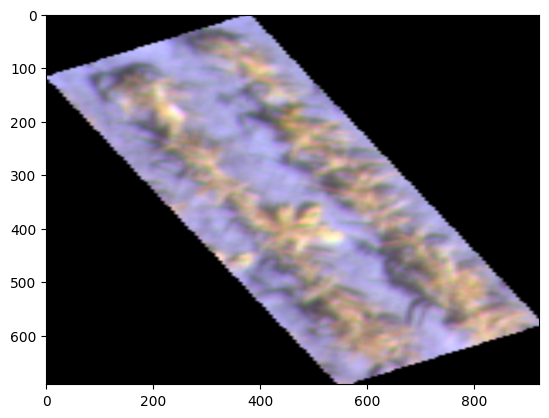

In [5]:
### Resize the image to size (922, 691) and continue with the resized image for the next tasks.
new_shape = (922, 691)
image_resized = cv2.resize(image, new_shape)
plt.imshow(image_resized);

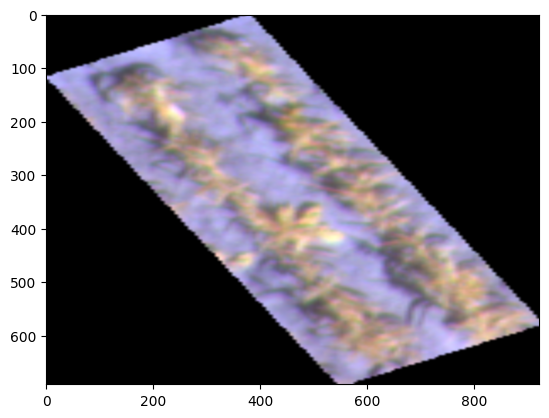

In [6]:
### Blur the image
ksize = (10, 10)
im_blur = cv2.GaussianBlur(image_resized, (3,3), 0)
plt.imshow(im_blur);

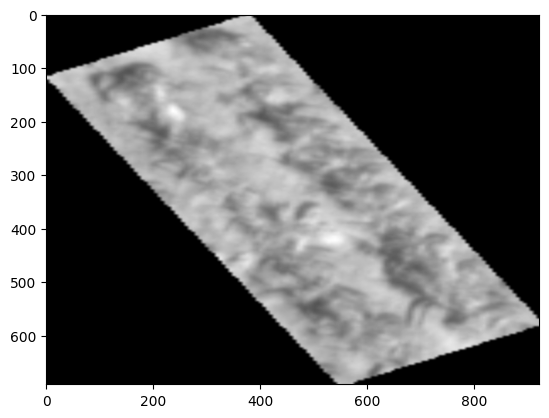

In [7]:
# and transform it into grey scale.
im_grey = cv2.cvtColor(im_blur, cv2.COLOR_BGR2GRAY)
plt.imshow(im_grey, cmap='gray');

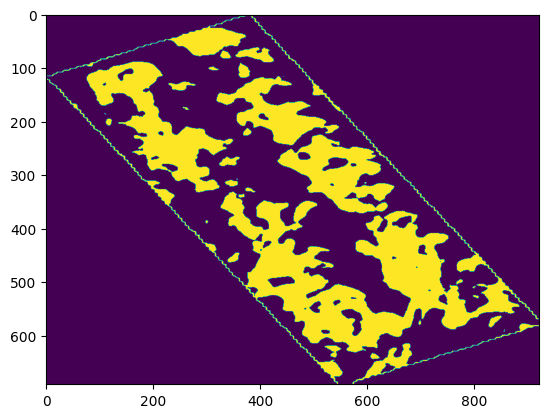

In [20]:
### Create a binary mask of the blurred grey scale image with the cv2.inRange() function.
mask = cv2.inRange(im_grey, 90, 160)

plt.imshow(mask);

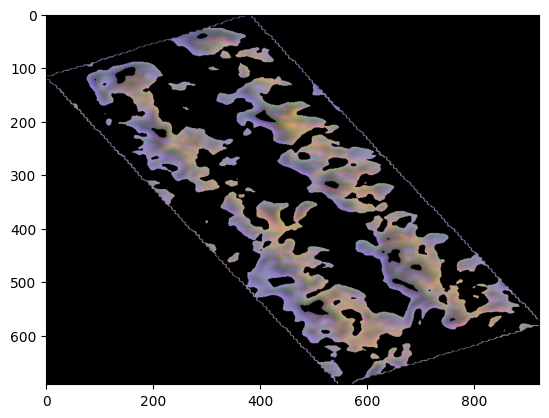

In [19]:
### Now apply the mask to the resized RGB image. Therefore use the cv2.bitwise_and() function.
im_result = cv2.bitwise_and(image_resized, image_resized ,mask=mask)
plt.imshow(im_result);
### Congratulations: If everything went right, you now segmented the maize plants from the soil!

### Bonus question: Some of the arguments that you give to the cv2.bitwise_and() function are redundant.

### Which arguments are redundant and what is the reason for the redundancy?

***ANWSER:***


`cv2.bitwise_and()` has as arguments `src1` (first input array or a scalar.) and `src2` (second input array or a scalar).
Those here are redundant in our code. 

In our case:

Both src1 and src2 are set to image_resized, meaning the operation is essentially doing image_resized AND image_resized.
This operation is redundant because performing a bitwise AND of an image with itself doesn't change the image (each pixel will simply AND with itself).

In effect, the code simply applies the mask to image_resized and does not perform a meaningful AND operation between two distinct images.

Source: https://docs.opencv.org/2.4.13.2/modules/core/doc/operations_on_arrays.html?highlight=bitwise#bitwise-and

In [10]:
### Save the image.
cv2.imwrite(f"{file_path}/Results/mask.png", im_result)

True